# Configure Plenoptic-Toolbox : Scale & Location

(1) Compare location w.r.t D-NeRF scene
(2) Manually change scale and location (transform 't' from transform matrix)

In [18]:
import json

# Set the plenoptic and dnerf dataset
# plen_fp ='data/plenoptic_toolbox/161029_sports1/dnerf/transforms_train.json'
plen_fp ='data/plenoptic_toolbox/161029_sports1/calibration_161029_sports1.json'

dnerf_fp = 'data/cut_roasted_beef/D-NeRF/transforms_train.json'

with open(plen_fp) as fp:
    plen_data = json.load(fp)

with open(dnerf_fp) as fp:
    dnerf_data = json.load(fp)

In [28]:
import numpy as np

def get_camera_locations(framedata, plen=False):
    loc = []
    for frame in framedata:
        transform = np.array(frame['transform_matrix'])
        print(transform)
        t = transform[:-1, -1]
        print(t)
        if plen:
            # t = t/100.
            t[0] = t[0] -1.
            t[1] = t[1] -110.
            t[2] = t[2] -310.
        else:
            print(frame['transform_matrix'])
        loc.append(t)
    return np.stack(loc, axis=0)


(31, 3)


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


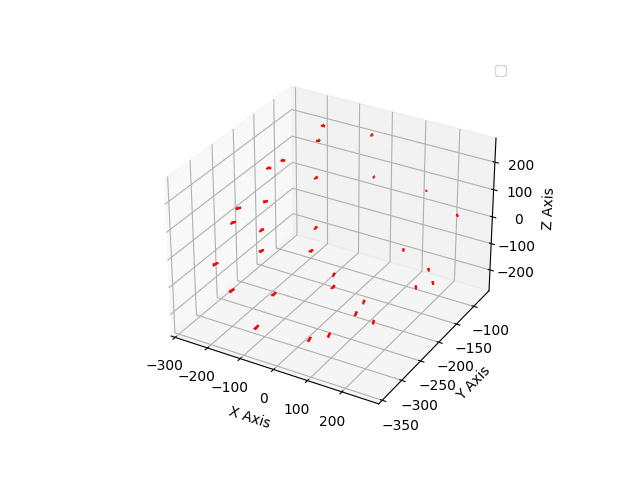

In [62]:
import matplotlib.pyplot as plt
%matplotlib widget

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

loc = []
for cam in plen_data['cameras']:
    if cam['type'] == 'hd':
        R = np.matrix(cam['R'])
        t = np.array(cam['t']).reshape((3,1))
        cc = (-R.transpose()*t)
        cc = (-R.transpose().dot(t))

        # Step 3: Get Direction of Rotation
        direction = -cc/np.linalg.norm(cc) # / np.linalg.norm(cc)
        
        ax.quiver(cc[0, 0], cc[1, 0], cc[2,0], direction[0, 0], direction[1, 0], direction[2,0],
                color='red', arrow_length_ratio=10.)

        # ax.scatter(cc[0, 0], cc[1, 0], cc[2,0], '.', color=[0,0,1])

ax.set_xlabel('X Axis')
ax.set_ylabel('Y Axis')
ax.set_zlabel('Z Axis')
ax.legend()
plt.show()